In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [346]:
df = pd.read_csv("Meshed_Nodes.txt")
df.head()

,x,y,z
0,2.995757,0.002121,0.002121
1,0.003725,2.995473,0.000802
2,2.000518,0.002405,0.997077
3,0.001604,2.995473,0.002923
4,1.996275,0.004527,0.999198


In [347]:
top_nodes = df[(df['z'] > 0.995) & (df['z'] < 0.998)]
bot_nodes = df[(df['z'] < -0.995) & (df['z'] > -0.998)]
display(top_nodes.head())
display(top_nodes.index)

,x,y,z
2,2.000518,0.002405,0.997077
5,0.002121,2.000000,0.997879
8,2.000518,-0.002405,0.997077
11,0.002121,-2.000000,0.997879
13,-0.002121,2.000000,0.997879


Index([  2,   5,   8,  11,  13,  17,  20,  23,  30,  33,  37,  39,  54,  58,
        61,  63,  97, 106, 109, 118, 121, 126, 133, 139, 156, 159, 162, 168,
       171, 195, 201, 204],
      dtype='int64')

In [348]:
def make_torus(precision, c, a): # num points, size, thickness
    #variables to loop through
    U = np.linspace(0, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    u, v = np.meshgrid(U, V)
    
    #parametric eqs
    x = (c + a * np.cos(v)) * np.cos(u)
    y = (c + a * np.cos(v)) * np.sin(u)
    z = a * np.sin(v)

    return x, y, z

In [349]:
precision = 5
x, y, z = make_torus(precision, 2, 1)

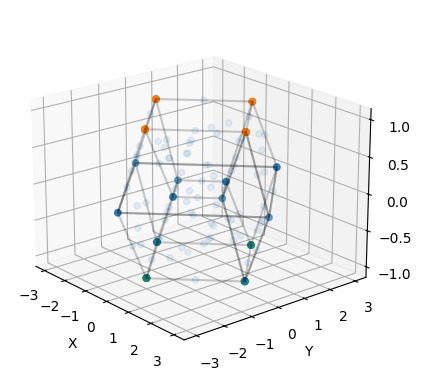

In [350]:
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')

#going thru each ring
ax2.scatter(df['x'], df['y'], df['z'], alpha=0.1)

#going thru each ring
ax2.plot_wireframe(x, y, z, color='black',alpha=0.2)
ax2.scatter(top_nodes['x'], top_nodes['y'], top_nodes['z'])
ax2.scatter(bot_nodes['x'], bot_nodes['y'], bot_nodes['z'])

#plotting bs dw ab it
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=20., azim=-40, roll=0)
plt.show()

In [360]:
for i in range(0, top_nodes.index.size):
    print(str(top_nodes.index[i] + 1) + ",0,0,-loadForce;") 
    print(str(bot_nodes.index[i] + 1) + ",0,0,loadForce;") 

3,0,0,-loadForce;
27,0,0,loadForce;
6,0,0,-loadForce;
30,0,0,loadForce;
9,0,0,-loadForce;
45,0,0,loadForce;
12,0,0,-loadForce;
48,0,0,loadForce;
14,0,0,-loadForce;
51,0,0,loadForce;
18,0,0,-loadForce;
54,0,0,loadForce;
21,0,0,-loadForce;
69,0,0,loadForce;
24,0,0,-loadForce;
72,0,0,loadForce;
31,0,0,-loadForce;
74,0,0,loadForce;
34,0,0,-loadForce;
78,0,0,loadForce;
38,0,0,-loadForce;
81,0,0,loadForce;
40,0,0,-loadForce;
84,0,0,loadForce;
55,0,0,-loadForce;
86,0,0,loadForce;
59,0,0,-loadForce;
90,0,0,loadForce;
62,0,0,-loadForce;
93,0,0,loadForce;
64,0,0,-loadForce;
96,0,0,loadForce;
98,0,0,-loadForce;
146,0,0,loadForce;
107,0,0,-loadForce;
152,0,0,loadForce;
110,0,0,-loadForce;
155,0,0,loadForce;
119,0,0,-loadForce;
179,0,0,loadForce;
122,0,0,-loadForce;
182,0,0,loadForce;
127,0,0,-loadForce;
185,0,0,loadForce;
134,0,0,-loadForce;
191,0,0,loadForce;
140,0,0,-loadForce;
194,0,0,loadForce;
157,0,0,-loadForce;
212,0,0,loadForce;
160,0,0,-loadForce;
215,0,0,loadForce;
163,0,0,-loadForce;
21

In [352]:
top_bars = df[(df['z'] > 0.99)]
display(top_bars.head())
display(top_bars.index)

,x,y,z
2,2.000518,0.002405,0.997077
4,1.996275,0.004527,0.999198
5,0.002121,2.000000,0.997879
8,2.000518,-0.002405,0.997077
10,1.996275,-0.004527,0.999198


Index([  2,   4,   5,   8,  10,  11,  13,  14,  17,  19,  20,  23,  30,  31,
        33,  36,  37,  39,  54,  57,  58,  60,  61,  63,  97, 103, 106, 108,
       109, 110, 115, 118, 120, 121, 122, 124, 126, 127, 128, 133, 136, 138,
       139, 140, 156, 159, 162, 168, 171, 195, 201, 204],
      dtype='int64')

In [353]:
mid_nodes = df[(df['z'] == 0) | (df['z'] == 0.5) | (df['z'] == -0.5)]
display(mid_bars.head())
display(mid_bars.index)

,x,y,z
99,2.995757,0.002121,0.0
100,0.003725,2.995473,0.0
101,1.499741,1.498797,0.0
104,1.000530,1.499470,0.5
111,2.995757,-0.002121,0.0


Index([ 99, 100, 101, 104, 111, 112, 113, 116, 125, 129, 130, 131, 137, 141,
       142, 143, 149, 161, 165, 166, 167, 170, 174, 175, 176, 182, 188, 197,
       198, 199, 200, 206, 207, 208, 209, 215, 218, 227, 233, 239],
      dtype='int64')

In [354]:
bot_bars = df[(df['z'] < -0.99)]
display(bot_bars.head())
display(bot_bars.index)

,x,y,z
26,2.000518,0.002405,-0.997077
28,1.996275,0.004527,-0.999198
29,0.002121,2.000000,-0.997879
43,1.995429,0.003346,-0.998775
44,0.002121,1.995757,-0.997879


Index([ 26,  28,  29,  43,  44,  47,  50,  52,  53,  67,  68,  71,  73,  74,
        77,  79,  80,  83,  85,  86,  89,  91,  92,  95, 145, 148, 151, 153,
       154, 155, 178, 181, 184, 187, 190, 192, 193, 194, 211, 214, 217, 219,
       220, 221, 223, 226, 228, 229, 230, 232, 235, 238],
      dtype='int64')

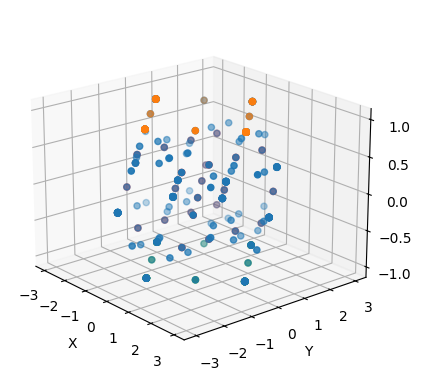

In [357]:
bars = pd.read_csv("Meshed_Bars.txt")

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')

#going thru each ring
ax2.scatter(df['x'], df['y'], df['z'])

ax2.scatter(top_bars['x'], top_bars['y'], top_bars['z'])
ax2.scatter(bot_bars['x'], bot_bars['y'], bot_bars['z'])
ax2.scatter(mid_bars['x'], mid_bars['y'], mid_bars['z'])

#plotting bs dw ab it
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=20., azim=-40, roll=0)
plt.show()

In [359]:
#here we print the supplemental bars?
#for i in range(0, top_bars.index.size):
#    print(str(top_bars.index[i] + 1) + ",0,0,1;")
for i in range(0, mid_bars.index.size):
    print(str(mid_bars.index[i] + 1) + ",1,1,1;")

100,1,1,1;
101,1,1,1;
102,1,1,1;
105,1,1,1;
112,1,1,1;
113,1,1,1;
114,1,1,1;
117,1,1,1;
126,1,1,1;
130,1,1,1;
131,1,1,1;
132,1,1,1;
138,1,1,1;
142,1,1,1;
143,1,1,1;
144,1,1,1;
150,1,1,1;
162,1,1,1;
166,1,1,1;
167,1,1,1;
168,1,1,1;
171,1,1,1;
175,1,1,1;
176,1,1,1;
177,1,1,1;
183,1,1,1;
189,1,1,1;
198,1,1,1;
199,1,1,1;
200,1,1,1;
201,1,1,1;
207,1,1,1;
208,1,1,1;
209,1,1,1;
210,1,1,1;
216,1,1,1;
219,1,1,1;
228,1,1,1;
234,1,1,1;
240,1,1,1;
